# Xử lý ảnh

## INT3404 30 ----- 8-10 Monday - 309GD3
## Diep Ng., Ph.D.

### Mail-to: ngocdiep at vnu.edu.vn

## Week 6: Morphological operations

In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [2]:
%matplotlib inline


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = [4,3]

# Morphological operations

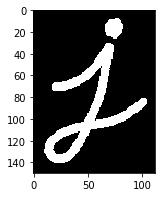

In [5]:
bw = cv2.imread("j.png", 0)
plt.imshow(bw, cmap='gray')

## Erosion 

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [14]:
k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
k

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

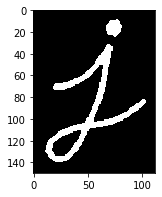

In [15]:
erosion = cv2.erode(bw, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')

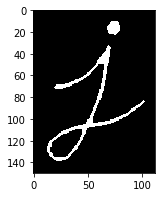

In [16]:
#more
erosion2 = cv2.erode(bw, kernel, iterations=2)
plt.imshow(erosion2, cmap='gray')

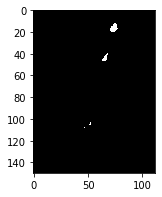

In [13]:
#or
erosion2 = cv2.erode(erosion, kernel, iterations=1)
plt.imshow(erosion2, cmap='gray')

## Dilation


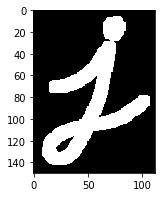

In [11]:
dilation = cv2.dilate(bw, kernel, iterations=1)
plt.imshow(dilation, cmap='gray')

## Combination of Dilation and Erosion

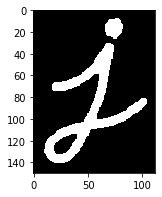

In [14]:
#dilation then erosion
de = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(de, cmap='gray')

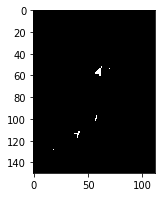

In [16]:
diff_de = bw - de
plt.imshow(diff_de, cmap='gray')

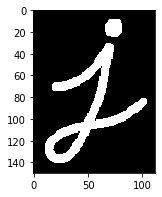

In [15]:
# erode then dilate?
ed = cv2.dilate(erosion, kernel, iterations=1)
plt.imshow(ed, cmap='gray')

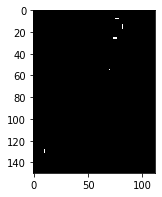

In [17]:
diff_ed = bw - ed
plt.imshow(diff_ed, cmap='gray')

## Opening


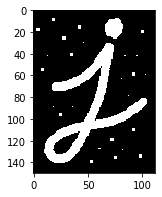

In [23]:
bw = cv2.imread("opening.png", 0)
plt.imshow(bw, cmap='gray')

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

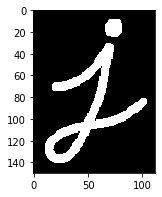

In [27]:
opening = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

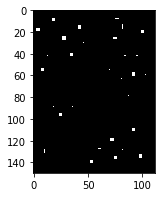

In [28]:
diff_opening = bw - opening
plt.imshow(diff_opening, cmap='gray')

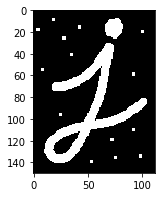

In [29]:
# what if smaller size of kernel

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

## Closing


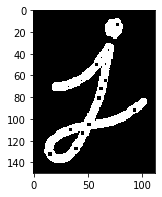

In [17]:
bw = cv2.imread("closing.png", 0)
plt.imshow(bw, cmap='gray')

In [18]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

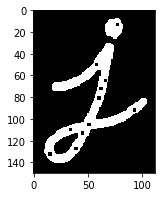

In [19]:
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

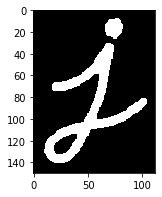

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
plt.imshow(cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel), cmap='gray') #dilate -> erose = closing

# License plate detection

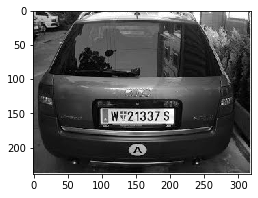

In [60]:
image = cv2.imread("license.jpg", 0)
plt.imshow(image, cmap='gray')

In [30]:
cv2.threshold??

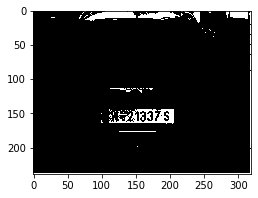

In [62]:
#thresholding
ret, thresh = cv2.threshold(image, 210, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

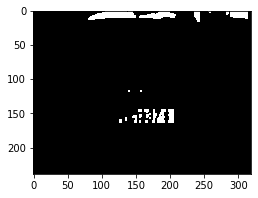

In [63]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

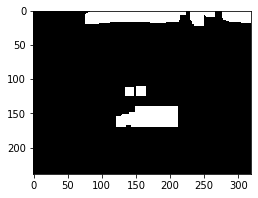

In [64]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [65]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)


In [69]:
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

20
24
19
14
14
30


In [68]:
#get only the region with highest height

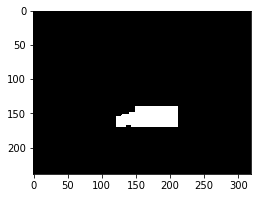

In [71]:
mask = np.zeros_like(dilation, dtype=np.uint8)
mask[labels==6] = 255
plt.imshow(mask, cmap='gray')

## using more information for guiding detection

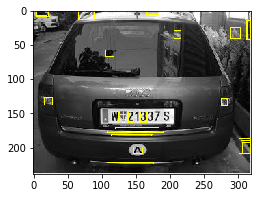

In [73]:
# Calling MSER algorithm for detect text regions
img = cv2.imread("license.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mser = cv2.MSER_create(_max_area=100)
regions, _ = mser.detectRegions(gray)  # Get the text area
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]  # Drawing text areas
# cv2.polylines(img, hulls, 1, (0, 255, 0))
# Processing irregular detection boxes into rectangular boxes
keep = []
for c in hulls:
    x, y, w, h = cv2.boundingRect(c)
    keep.append([x, y, x + w, y + h])
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 0), 1)
plt.imshow(img)

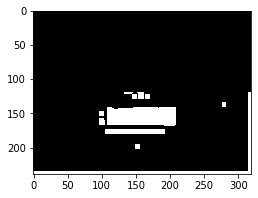

In [75]:
#Using approximate location
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
#remove some noise
x = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
h, w = x.shape
x[0:h//2, :] = 0 #at lower half of the image
# nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)


plt.imshow(x, cmap='gray')